## Layering Neurons Together

In [ ]:
뉴런을 여러 개 묶은 Fully Connected Layer예제를 분석해보자.

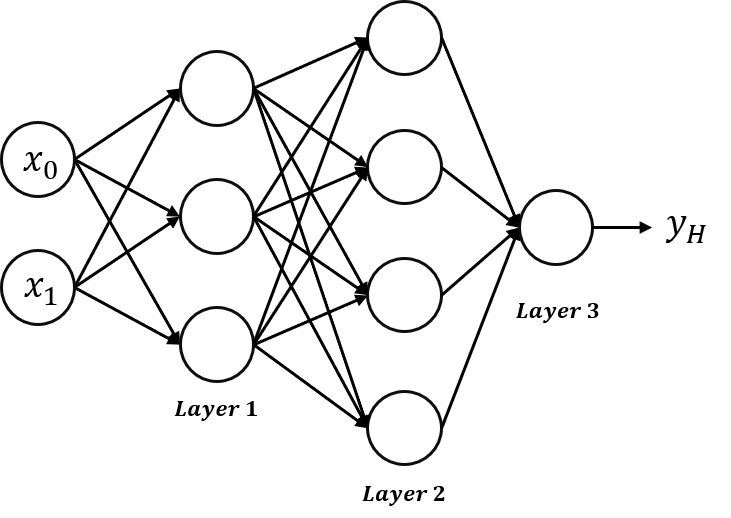

In [ ]:
class FullyConnectedLayer(object):
    """간단한 FC 신경망
    Args:
        num_inputs (int): 입력 벡터 크기 / 입력 값의 개수
        layer_size (int): 출력 벡터 크기 / 뉴런의 개수
        activation_function (callable): 이 계층에 사용할 Activation function
    Attributes:
        W (ndarray): 각 입력값에 대응되는 Weight
        b (ndarray): Weight sum(가중합)에 더해질 Bias 값
        size (int): 레이어 크기/뉴런 개수
        activation_function (callable): 뉴런에 적용할 Activation Function
        x (ndarray): 역전파를 위해 마지막에 제공되는 입력 벡터
        y (ndarray): 역전파로 사용되기 위해 x에 대응되는 출력값
        derivated_activation_function (callable): 역전파에 해당되는 파생함수
        dL_dW (ndarray): 가중치 W에 대한 Loss미분값
        dL_db (ndarray): 편향 b에 대한 Loss미분값
    """

    def __init__(self, num_inputs, layer_size, activation_function, derivated_activation_function=None):
        super().__init__()

        # 랜덤하게 Weight와 Bias를 초기화(정규 분포를 사용):
        self.W = np.random.standard_normal((num_inputs, layer_size))
        self.b = np.random.standard_normal(layer_size)
        self.size = layer_size

        self.activation_function = activation_function
        self.derivated_activation_function = derivated_activation_function
        self.x, self.y = None, None
        self.dL_dW, self.dL_db = None, None

    def forward(self, x):
        """
        layer에 대해서 Input vector에 대한 Forward함수 / 출력값은 Activation Function 적용된 값.
        Args:
            x (ndarray): (batch_size, num_inputs)사이즈의 입력 벡터
        Returns:
            activation (ndarray): (batch_size, layer_size)사이즈의 Activation vector
        """
        z = np.dot(x, self.W) + self.b
        self.y = self.activation_function(z)
        self.x = x  #역전파를 위해 입력, 출력물 저장
        return self.y

    def backward(self, dL_dy):
        """
        Back-propagate the loss, computing all the derivatives, storing those w.r.t. the layer parameters,
        and returning the loss w.r.t. its inputs for further propagation.
        Args:
            dL_dy (ndarray): The loss derivative w.r.t. the layer's output (dL/dy = l'_{k+1}).
        Returns:
            dL_dx (ndarray): The loss derivative w.r.t. the layer's input (dL/dx).
        """
        dy_dz = self.derivated_activation_function(self.y)  # = f'
        dL_dz = (dL_dy * dy_dz) # dL/dz = dL/dy * dy/dz = l'_{k+1} * f'
        dz_dw = self.x.T
        dz_dx = self.W.T
        dz_db = np.ones(dL_dy.shape[0]) # dz/db = d(W.x + b)/db = 0 + db/db = "ones"-vector

        # Computing the derivatives with respect to the layer's parameters, and storing them for opt. optimization:
        self.dL_dW = np.dot(dz_dw, dL_dz)
        self.dL_db = np.dot(dz_db, dL_dz)

        # Computing the derivative with respect to the input, to be passed to the previous layers (their `dL_dy`):
        dL_dx = np.dot(dL_dz, dz_dx)
        return dL_dx

    def optimize(self, epsilon):
        """
        Optimize the layer's parameters, using the stored derivative values.
        Args:
            epsilon (float): The learning rate.
        """
        self.W -= epsilon * self.dL_dW
        self.b -= epsilon * self.dL_db

***Note:*** This class can also be found in [fully_connected_layer.py](fully_connected_layer.py). 

Once again, let us quickly show how this *layer* can be used to process input values, one by one or stacked together into ***batches***. We instantiate a layer of 3 neurons (so 3 output values), taking 2 input values and applying this time the ***ReLU*** (Rectified Linear Unit) function for the activations: 

In [ ]:
input_size    = 2
num_neurons   = 3
relu_function = lambda y: np.maximum(y, 0)

layer = FullyConnectedLayer(num_inputs=input_size, layer_size=num_neurons, activation_function=relu_function)

We randomly generate 2 random input vectors:

In [ ]:
x1 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print("Input vector #1: {}".format(x1))

Input vector #1: [[-0.72101228 -0.4157107 ]]


In [ ]:
x2 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print("Input vector #2: {}".format(x2))

Input vector #2: [[-0.26727631 -0.08786003]]


Our layer can either process them separetely:

In [ ]:
y1 = layer.forward(x1)
print("Layer's output value given `x1` : {}".format(y1))

Layer's output value given `x1` : [[0.         0.4593046  1.61941647]]


In [ ]:
y2 = layer.forward(x2)
print("Layer's output value given `x2` : {}".format(y2))

Layer's output value given `x2` : [[0.         0.73048436 1.05288999]]


... or together:

In [ ]:
x12 = np.concatenate((x1, x2))  # stack of input vectors, of shape `(2, 2)`
y12 = layer.forward(x12)
print("Layer's output value given `[x1, x2]` :\n{}".format(y12))

Layer's output value given `[x1, x2]` :
[[0.         0.4593046  1.61941647]
 [0.         0.73048436 1.05288999]]
